In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "sample-insurance-claim-prediction-dataset"

# Understanding the dataset

In [2]:
data1=read.csv("/kaggle/input/sample-insurance-claim-prediction-dataset/insurance2.csv")
summary(data1)

      age             sex              bmi           children    
 Min.   :18.00   Min.   :0.0000   Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Median :1.0000   Median :30.40   Median :1.000  
 Mean   :39.21   Mean   :0.5052   Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00   3rd Qu.:1.0000   3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00   Max.   :1.0000   Max.   :53.13   Max.   :5.000  
     smoker           region         charges      insuranceclaim  
 Min.   :0.0000   Min.   :0.000   Min.   : 1122   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.: 4740   1st Qu.:0.0000  
 Median :0.0000   Median :2.000   Median : 9382   Median :1.0000  
 Mean   :0.2048   Mean   :1.516   Mean   :13270   Mean   :0.5852  
 3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:16640   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :3.000   Max.   :63770   Max.   :1.0000  

**converting sex,children,smoker,region and insurance claim as catogorical variable**

In [3]:
#sex

data1$sex=cut(data1$sex,breaks = c(0,1,2),labels = c("female","male"),right = FALSE)


#children 

data1$children=cut(data1$children,breaks = c(0,1,2,3,4,5,6),labels = c("0children","1children","2children","3children","4children","5children"),right = FALSE)


#smoker


data1$smoker=cut(data1$smoker,breaks = c(0,1,2),labels = c("no","yes"),right = FALSE)


#region


data1$region=cut(data1$region,breaks = c(0,1,2,3,4),labels = c("region0","region1","region2","region3"),right = FALSE)


# insurance claim 

data1$insuranceclaim=cut(data1$insuranceclaim,breaks = c(0,1,2),labels = c("no","yes"),right = FALSE)

#now all the required numerical variables are changed into catogorical variables

summary(data1)

      age            sex           bmi             children   smoker    
 Min.   :18.00   female:662   Min.   :15.96   0children:574   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1children:324   yes: 274  
 Median :39.00                Median :30.40   2children:240             
 Mean   :39.21                Mean   :30.66   3children:157             
 3rd Qu.:51.00                3rd Qu.:34.69   4children: 25             
 Max.   :64.00                Max.   :53.13   5children: 18             
     region       charges      insuranceclaim
 region0:324   Min.   : 1122   no :555       
 region1:325   1st Qu.: 4740   yes:783       
 region2:364   Median : 9382                 
 region3:325   Mean   :13270                 
               3rd Qu.:16640                 
               Max.   :63770                 

# Exploratory data analysis for charges 

**Relation between age and charges**

Warning message:
“Use of `data1$age` is discouraged.
ℹ Use `age` instead.”
Warning message:
“Use of `data1$charges` is discouraged.
ℹ Use `charges` instead.”
Warning message:
“Use of `data1$age` is discouraged.
ℹ Use `age` instead.”
Warning message:
“Use of `data1$charges` is discouraged.
ℹ Use `charges` instead.”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


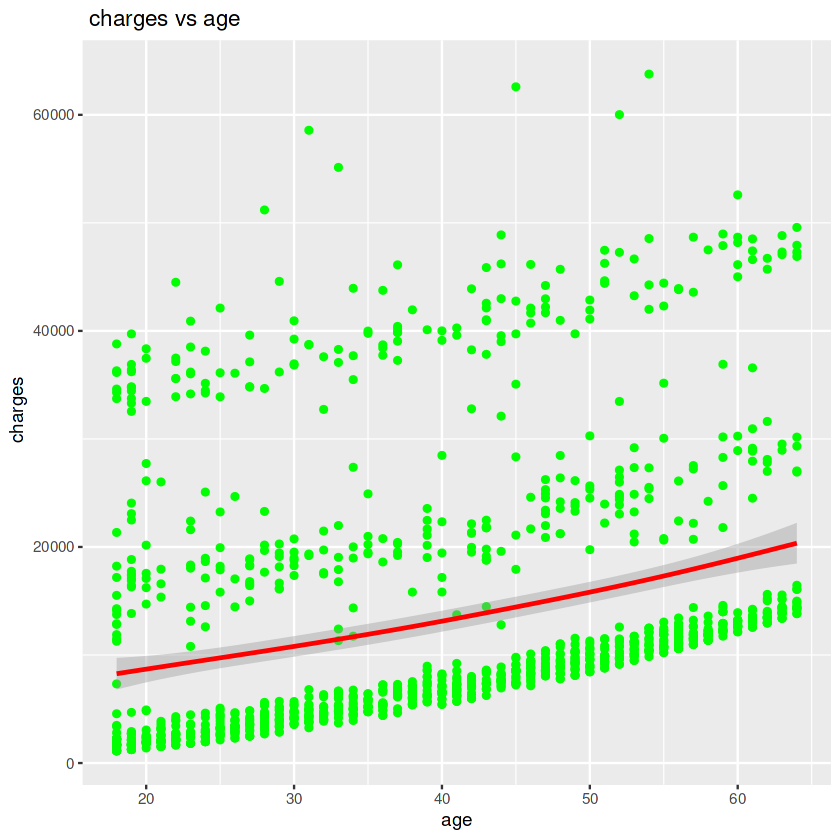

In [4]:
ggplot(data=data1,aes(x=data1$age,y=data1$charges))+geom_point(col="green")+geom_smooth(col="red")+labs(title = " charges vs age ",x="age",y=" charges")

**we can observe a three line structure arisen in the plot now we need to take other catogorical variables into consideration to understand the reason behind the three line structure**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


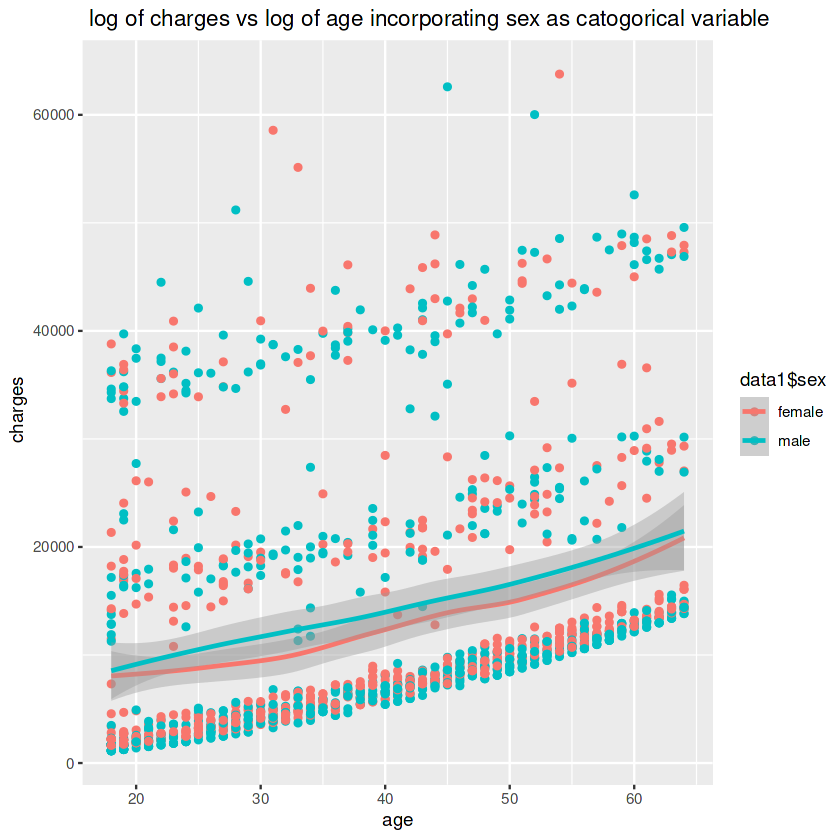

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


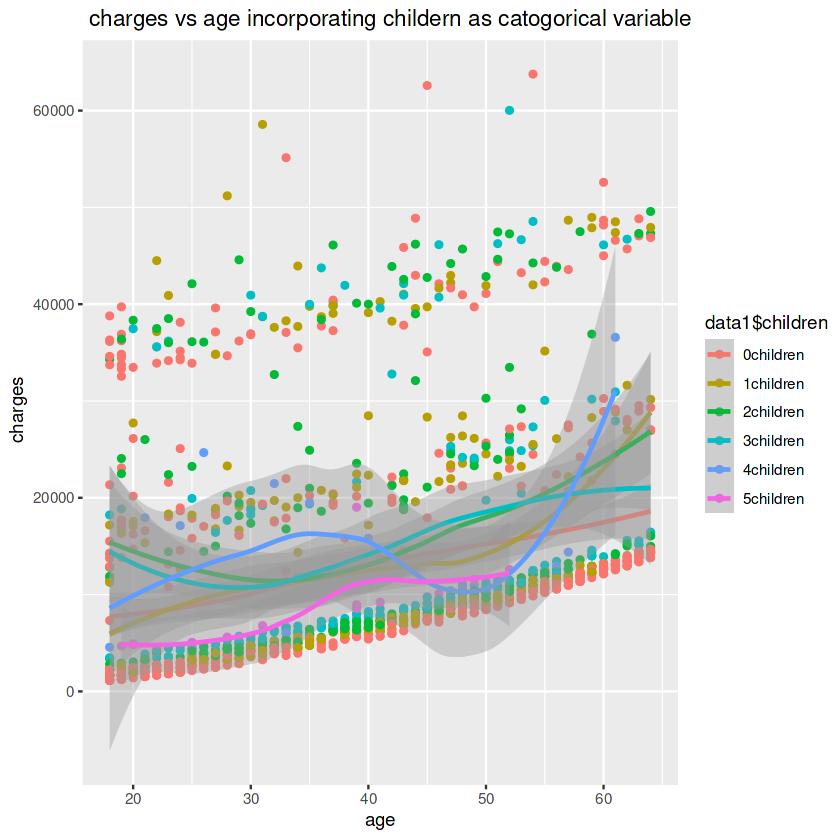

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


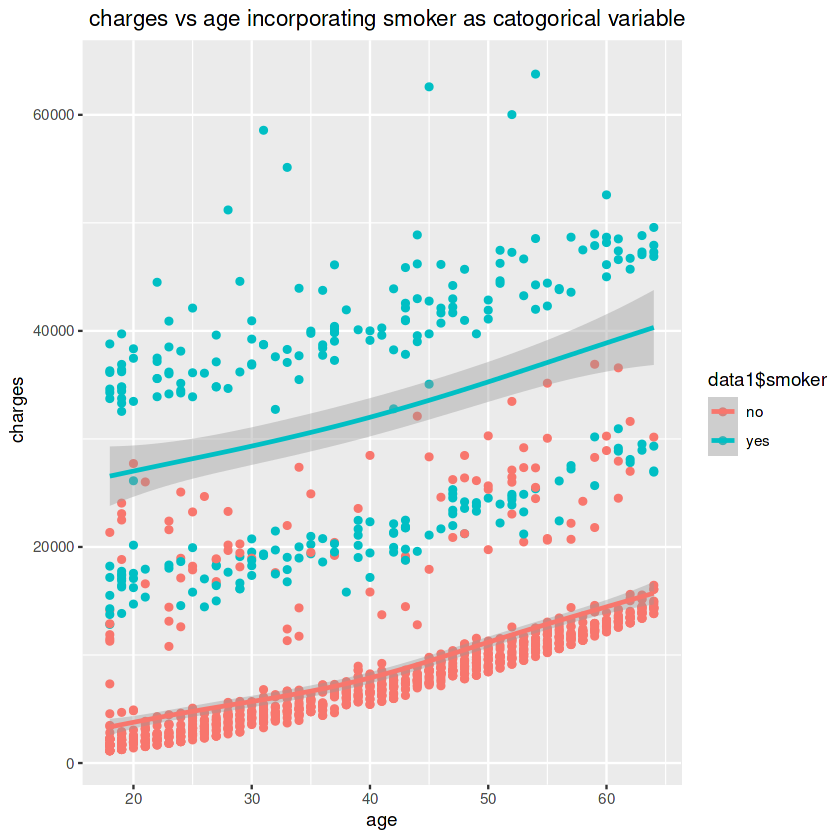

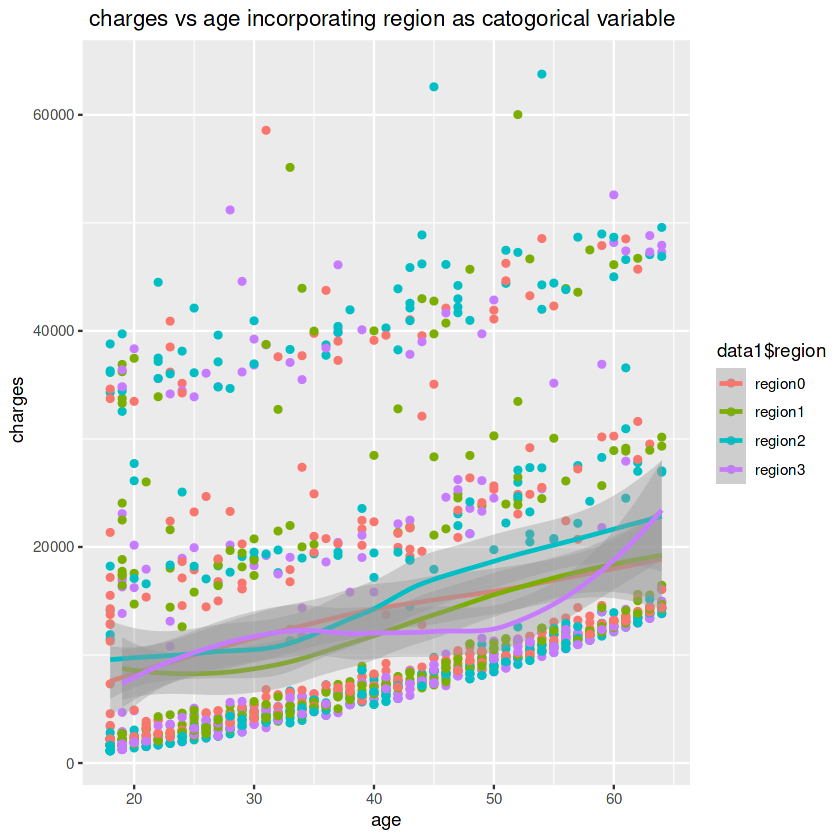

In [5]:
#making plot of log of age and log of charges incorporating sex as catogorical variable

options(warn=-1)
ggplot(data=data1,aes(x=data1$age,y=data1$charges,colour=data1$sex))+geom_point()+geom_smooth()+labs(title = " log of charges vs log of age incorporating sex as catogorical variable",x="age",y=" charges")


#making plot of age and charges incorporating childern/no. of dependents as catogorical variable

ggplot(data=data1,aes(x=data1$age,y=data1$charges,colour=data1$children))+geom_point()+geom_smooth()+labs(title = " charges vs age incorporating childern as catogorical variable",x="age",y=" charges")


#making plot of age and charges incorporating smoker status as catogorical variable

ggplot(data=data1,aes(x=data1$age,y=data1$charges,colour=data1$smoker))+geom_point()+geom_smooth()+labs(title = " charges vs age incorporating smoker as catogorical variable",x="age",y=" charges")

#making plot of age and charges incorporating region as catogorical variable

ggplot(data=data1,aes(x=data1$age,y=data1$charges,colour=data1$region))+geom_point()+geom_smooth()+labs(title = " charges vs age incorporating region as catogorical variable",x="age",y=" charges")




**the first plot indicate that there is very less difference between average hospitilization charges by male and female at each age**

**the second plot indicate that there is no perticular pattern in average hospitilisation charges based on number of children**

**the third plot indicate that smoker was the main reason why plot of charges vs age was having three line structure the people who smokes on an average charges very high in comparison to person who does not smoke**

**the fourth plot indicate that there is no perticular pattern in average charges based on region**

In [6]:
cor(data1$charges,data1$age)

[1] 0.2990082

In [7]:
cor(log(data1$charges),log(data1$age))

[1] 0.5350615

**We can notice that that the correlation has been increased as we have taken log of charges and log of age**

**Relation between charges and Bmi**

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


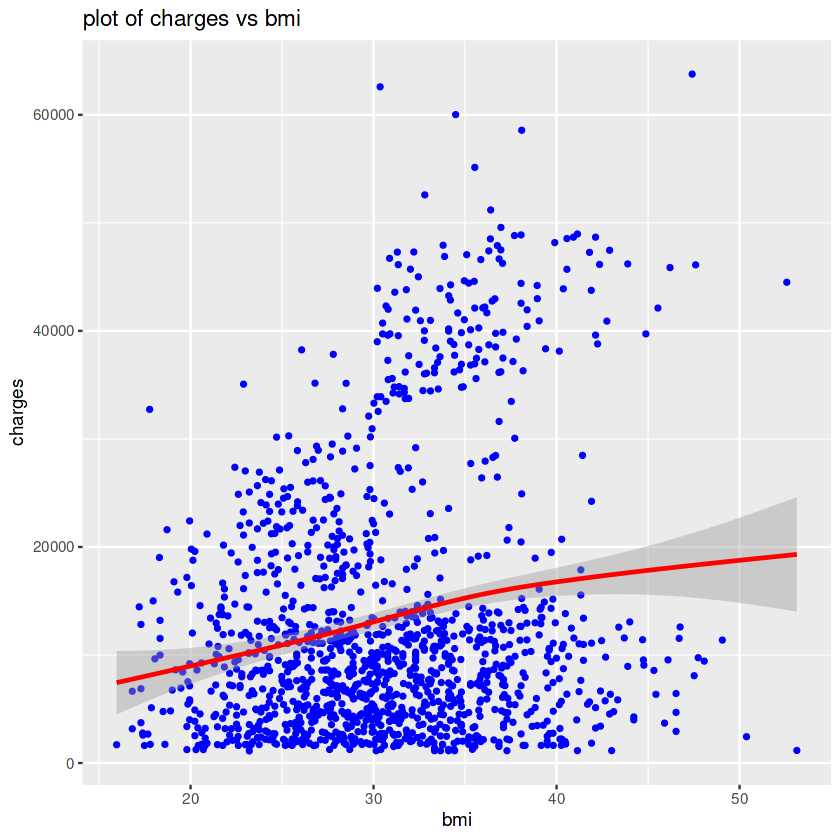

In [8]:
ggplot(data=data1,aes(x=data1$bmi,y=data1$charges))+geom_point(size=1,col="blue")+geom_smooth(col="red")+labs(title = "plot of charges vs bmi",x="bmi",y="charges")


**Now we can notice that as the bmi increases the scattering or dispersion of charges is also increasing now to find out reason for this we need to take catogorical variables into account**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


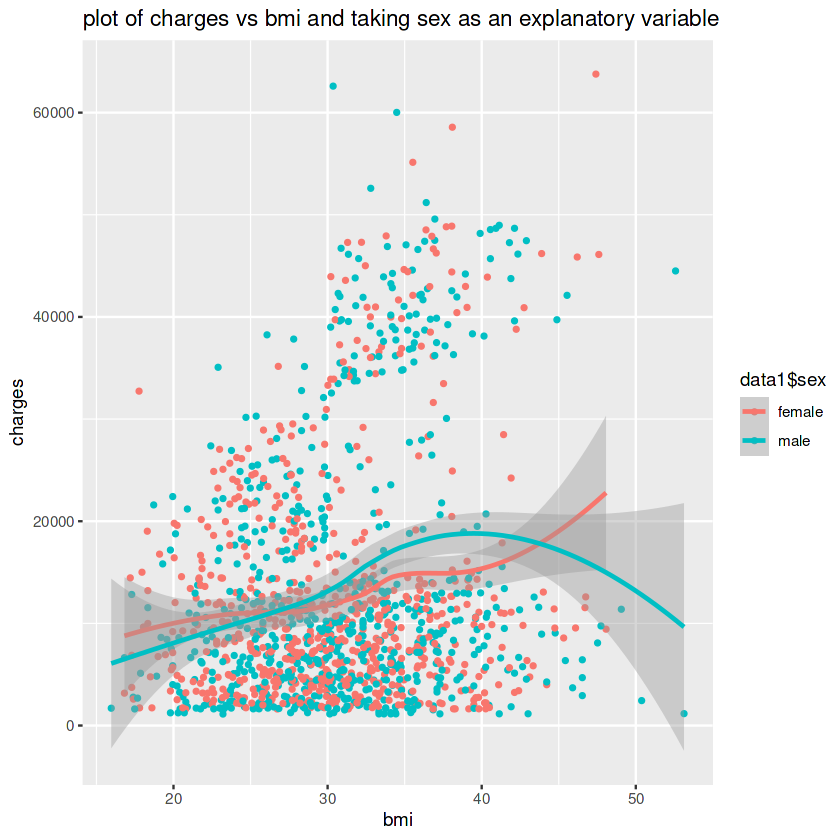

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


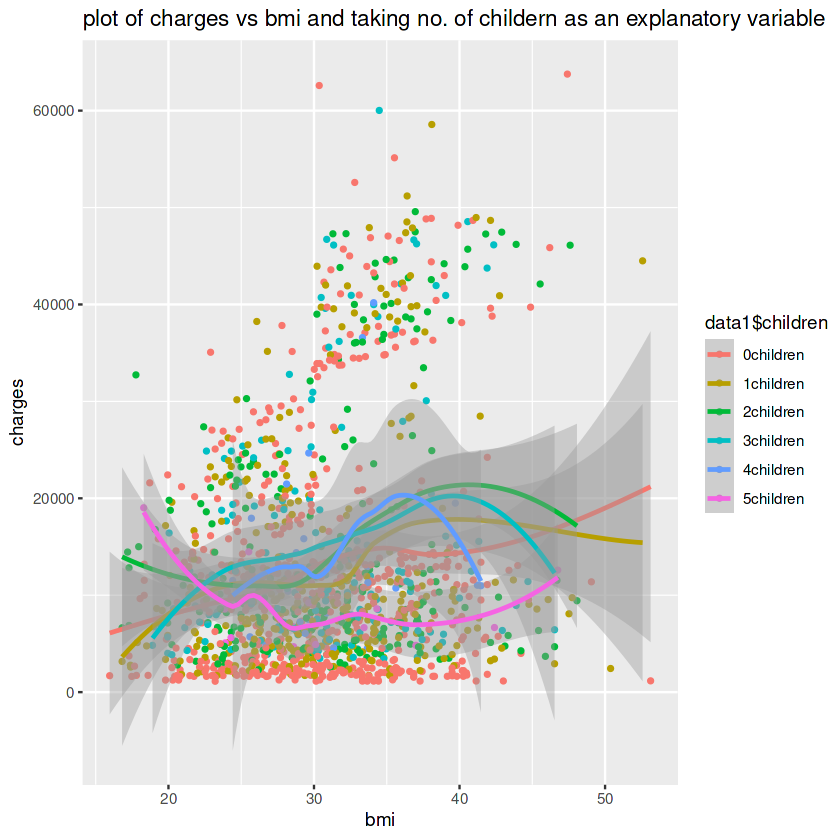

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


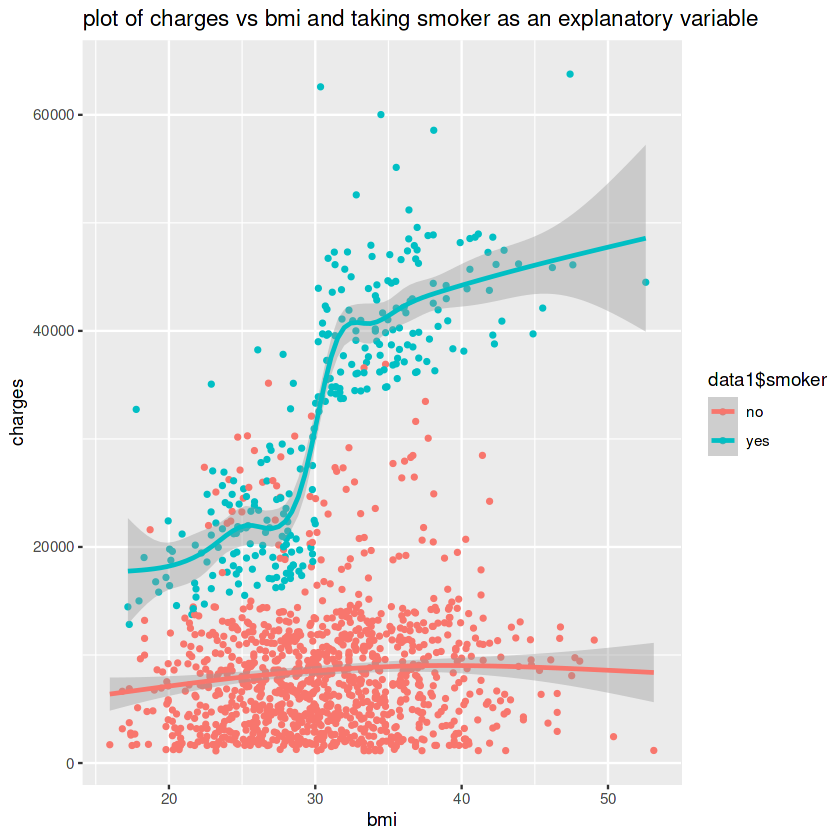

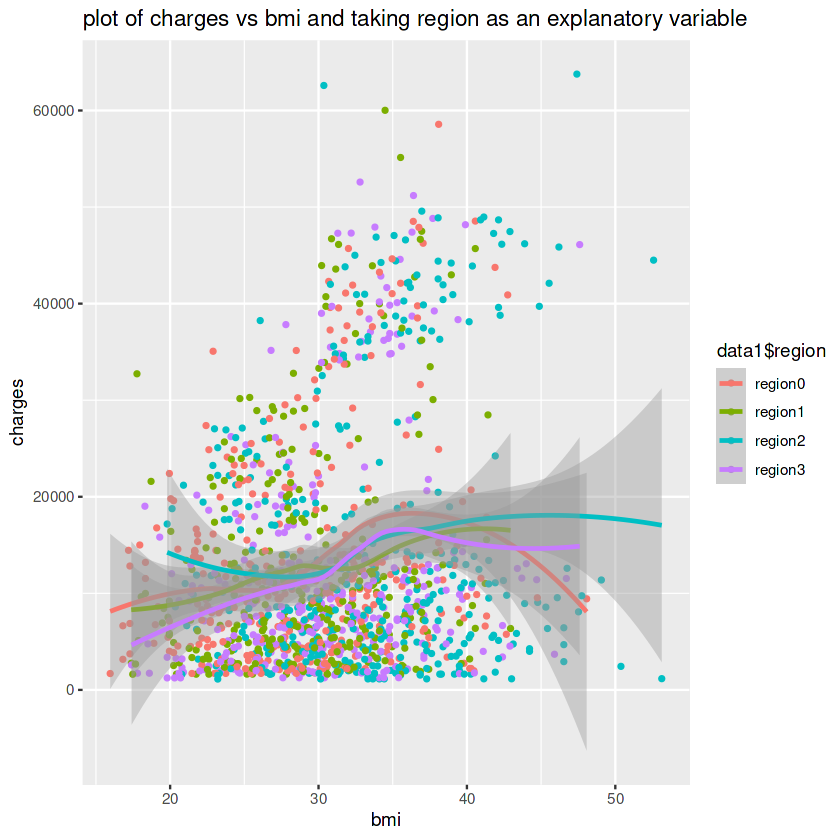

In [9]:
#making plot of charges vs bmi using sex as an explanatory variable

ggplot(data=data1,aes(x=data1$bmi,y=data1$charges,colour=data1$sex))+geom_point(size=1)+geom_smooth()+labs(title = "plot of charges vs bmi and taking sex as an explanatory variable",x="bmi",y="charges")

#comment- from above graph we can see that there is an  effect on charges based on sex but we cannot find any perticular relation 

#making plot of charges vs bmi using childern as an explanatory variable

ggplot(data=data1,aes(x=data1$bmi,y=data1$charges,colour=data1$children))+geom_point(size=1)+geom_smooth()+labs(title = "plot of charges vs bmi and taking no. of childern as an explanatory variable",x="bmi",y="charges")

#comment-here also we can see that there is an effect of no. of childern on charges for same bmi but we cannot find any perticular relation 

#making plot of charges vs bmi using smoker  as an explanatory variable

ggplot(data=data1,aes(x=data1$bmi,y=data1$charges,colour=data1$smoker))+geom_point(size=1)+geom_smooth()+labs(title = "plot of charges vs bmi and taking smoker as an explanatory variable",x="bmi",y="charges")

#comment- as we can notice here the two lines structure was arising due to smoker as indicated by plot so for same bmi the person who smokes charges higher and person who doesnt smoke charges lower in hospital 

#making plot of charges vs bmi using region  as an explanatory variable

ggplot(data=data1,aes(x=data1$bmi,y=data1$charges,colour=data1$region))+geom_point(size=1)+geom_smooth()+labs(title = "plot of charges vs bmi and taking region as an explanatory variable",x="bmi",y="charges")


**the first plot indicate that there is very little difference between average male and female charges at each point of bmi but in majority of part of plot the average charge of males is little higher than female**

**the second plot indicate there is no specific pattern based on number of children in average charges**

**the third plot indicate that smoker was the main reason behind the scattering/dispersion of plot when bmi increase this plot also indicate that for non smokers the charges are having little impact on charges as bmi is increasing ,but for smoker the charges have been suddenly increased when bmi of smoker reaches to around 27 and curve has shoot up and charges have gone till 40000 when bmi of smoker is around 31 so there is exponential growth in curve for smoker when bmi of smoker is between (27 to 31)**

**the fourth plot indicate that there is no specific pattern observed based on region**

# EDA on insurance claim

**relation of insurance claim and age**

mean_age,insurance_claim
<dbl>,<chr>
40.55172,yes
37.30991,no


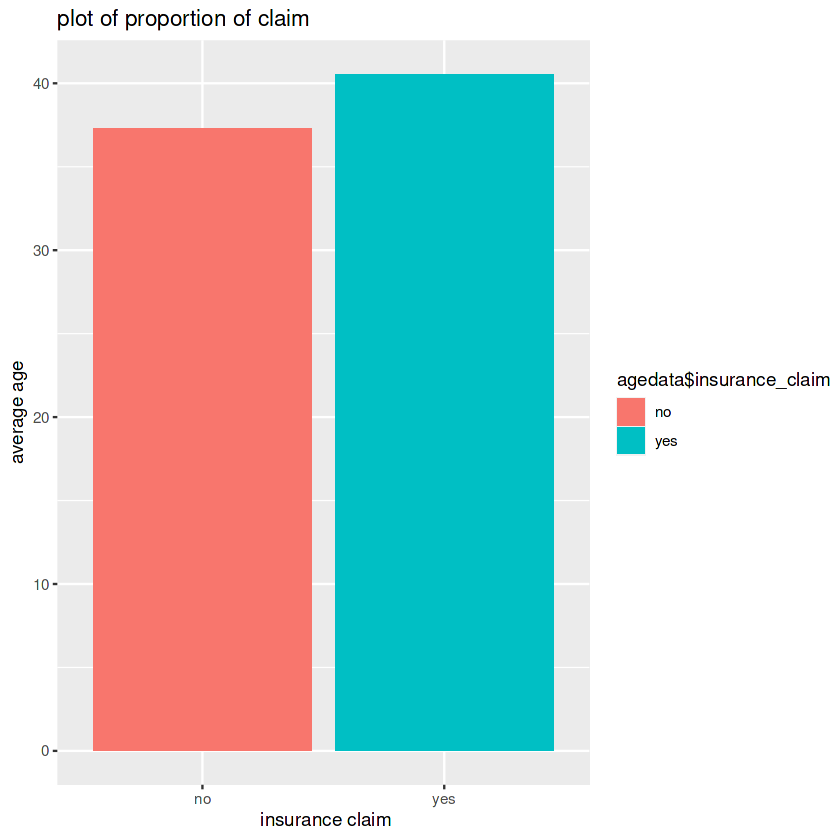

In [10]:
#relation of insurance claim and age 

attach(data1)

agedata=data.frame(c(mean(data1$age[data1$insuranceclaim=="yes"]),mean(data1$age[data1$insuranceclaim=="no"])),c("yes","no"))

names(agedata)=c("mean_age","insurance_claim")

agedata


ggplot(data=agedata,mapping = aes(y=agedata$mean_age,x=c("yes","no"),fill=agedata$insurance_claim))+geom_bar(stat = "identity")+labs(title = "plot of proportion of claim",x=" insurance claim",y="average age")



**the first plot indicate that average of a person who have done insurance claim is little higher than average age of a person who have not done insurance claim**

**relation of insurance claim and gender**

propotion of claim,gender
<dbl>,<chr>
0.6005917,male
0.5694864,female


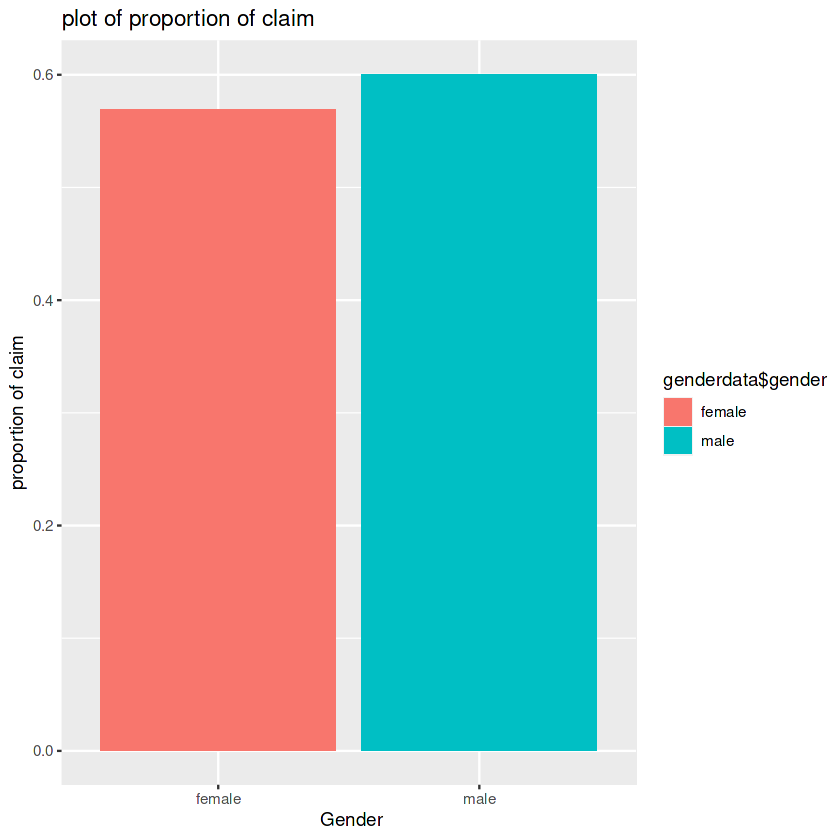

In [11]:
#relation of insurance claim and gender

a=NROW(data1$sex[data1$insuranceclaim=="yes"&data1$sex=="male"])/NROW(data1$sex[data1$sex=="male"])

b=NROW(data1$sex[data1$insuranceclaim=="yes"&data1$sex=="female"])/NROW(data1$sex[data1$sex=="female"])

genderdata=data.frame(c(a,b),c("male","female"))

names(genderdata)=c("propotion of claim","gender")

genderdata

ggplot(data=genderdata,mapping = aes(y=genderdata$`propotion of claim`,x=c("male","female"),fill=genderdata$gender))+geom_bar(stat = "identity")+labs(title = "plot of proportion of claim",x=" Gender",y="proportion of claim")


**the above plot indicate that males are having higher proportion of claim than the females so we can say that the males are having high probability of claiming when compared to females**

**relation of insurance claim and bmi**

average_bmi,claim
<dbl>,<chr>
32.63518,yes
27.88159,no


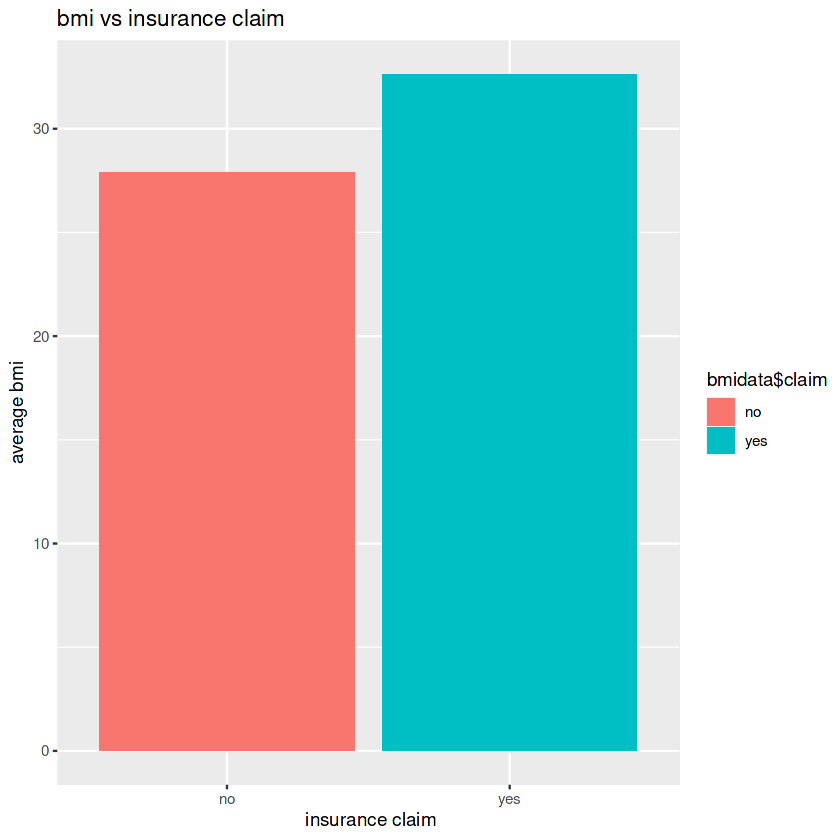

In [12]:
c=mean(data1$bmi[data1$insuranceclaim=="yes"])
d=mean(data1$bmi[data1$insuranceclaim=="no"])

bmidata=data.frame(c(c,d),c("yes","no"))

names(bmidata)=c("average_bmi","claim")

bmidata

ggplot(data=bmidata,aes(x=bmidata$claim,y=bmidata$average_bmi,fill=bmidata$claim))+geom_bar(stat = "identity")+labs(title = "bmi vs insurance claim",x=" insurance claim",y="average bmi")


**the above plot indicate that the average bmi of person having insurance claim is higher than average bmi of the person not having insurance claim**

**relation of no. of children and insurance claim**

claim_prop,childrens
<dbl>,<chr>
0.8066202,0children
0.5339506,1children
0.3916667,2children
0.2866242,3children
0.1600000,4children
0.2222222,5children


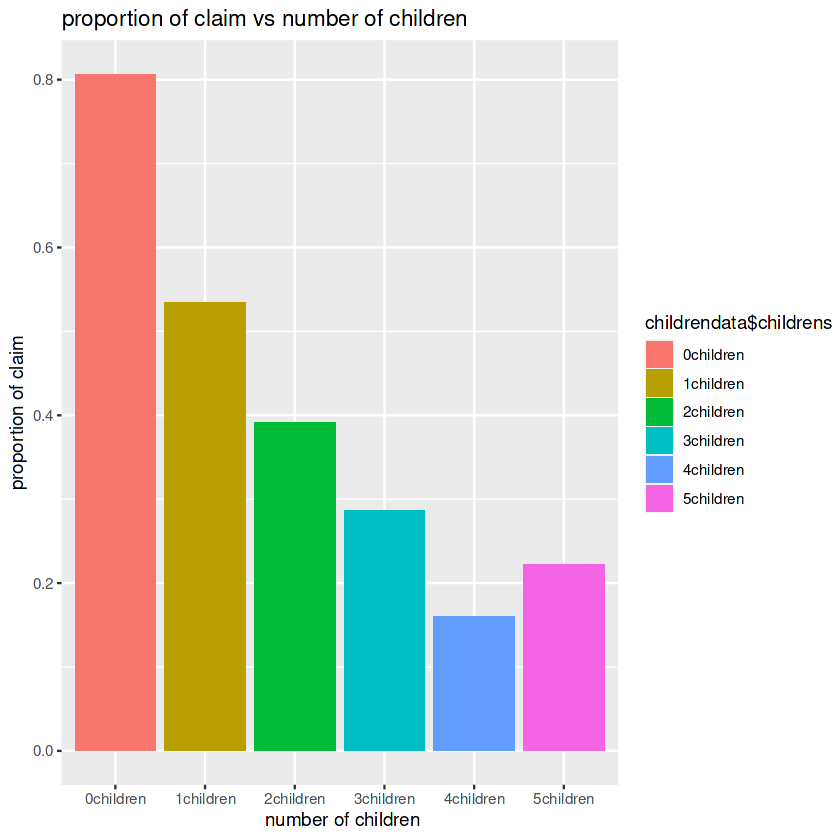

In [13]:
#0children
d=NROW(data1$children[data1$insuranceclaim=="yes"&data1$children=="0children"])/NROW(data1$children[data1$children=="0children"])

#1children
e=NROW(data1$children[data1$insuranceclaim=="yes"&data1$children=="1children"])/NROW(data1$children[data1$children=="1children"])

#2children
f=NROW(data1$children[data1$insuranceclaim=="yes"&data1$children=="2children"])/NROW(data1$children[data1$children=="2children"])

#3children
g=NROW(data1$children[data1$insuranceclaim=="yes"&data1$children=="3children"])/NROW(data1$children[data1$children=="3children"])

#4children
h=NROW(data1$children[data1$insuranceclaim=="yes"&data1$children=="4children"])/NROW(data1$children[data1$children=="4children"])

#5children
i=NROW(data1$children[data1$insuranceclaim=="yes"&data1$children=="5children"])/NROW(data1$children[data1$children=="5children"])

childrendata=data.frame(c(d,e,f,g,h,i),c("0children","1children","2children","3children","4children","5children"))

names(childrendata)=c("claim_prop","childrens")

childrendata

ggplot(data=childrendata,aes(x=childrendata$childrens,y=childrendata$claim_prop,fill=childrendata$childrens))+geom_bar(stat = "identity")+labs(title = "proportion of claim vs number of children",x=" number of children",y="proportion of claim")


**the above plot is indicating that as the number of children increases the proportion of claim or probability of making claim is decrasing till 4 childrens but we cannot say anything in case of 5 childrens as there are only 18 observation in case of 5 childrens**


**relation of smoker and insurance claim**



claimprop,smoking_status
<dbl>,<chr>
0.9087591,yes
0.5018797,no


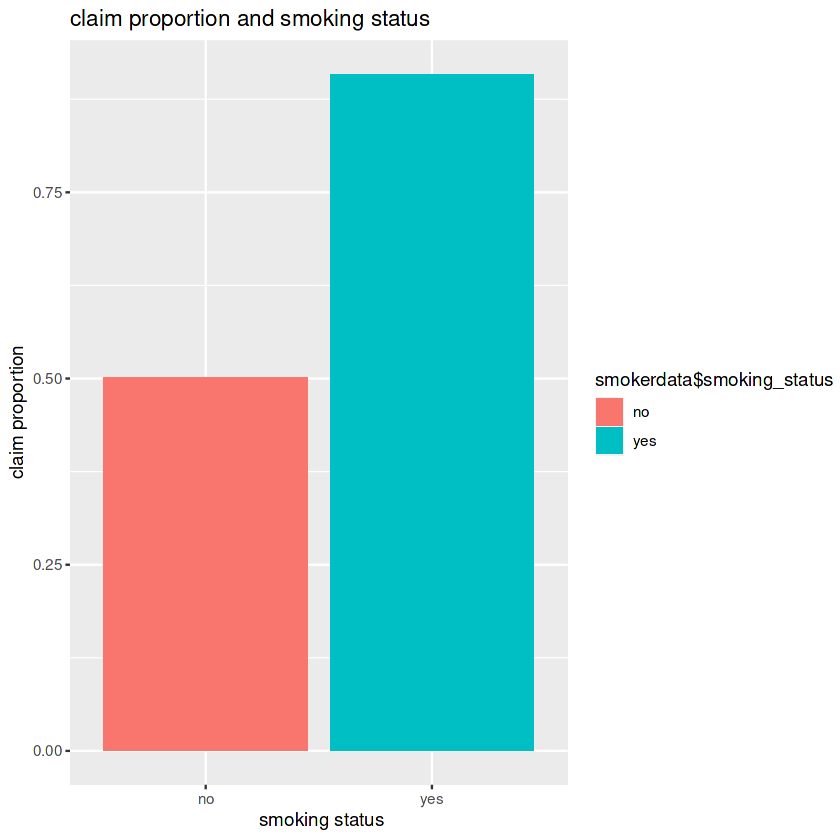

In [14]:
j=NROW(data1$smoker[data1$insuranceclaim=="yes"&data1$smoker=="yes"])/NROW(data1$smoker[data1$smoker=="yes"])

k=NROW(data1$smoker[data1$insuranceclaim=="yes"&data1$smoker=="no"])/NROW(data1$smoker[data1$smoker=="no"])

smokerdata=data.frame(c(j,k),c("yes","no"))

names(smokerdata)=c("claimprop","smoking_status")

smokerdata

ggplot(data=smokerdata,aes(x=smokerdata$smoking_status,y=smokerdata$claimprop,fill=smokerdata$smoking_status))+geom_bar(stat="identity")+labs(title = "claim proportion and smoking status",x=" smoking status",y="claim proportion")


**the above plot is indicating that proportion of claim of smokers is very very high when compared to proportion of claim of non smokers**

**relation of insurance claim and region**

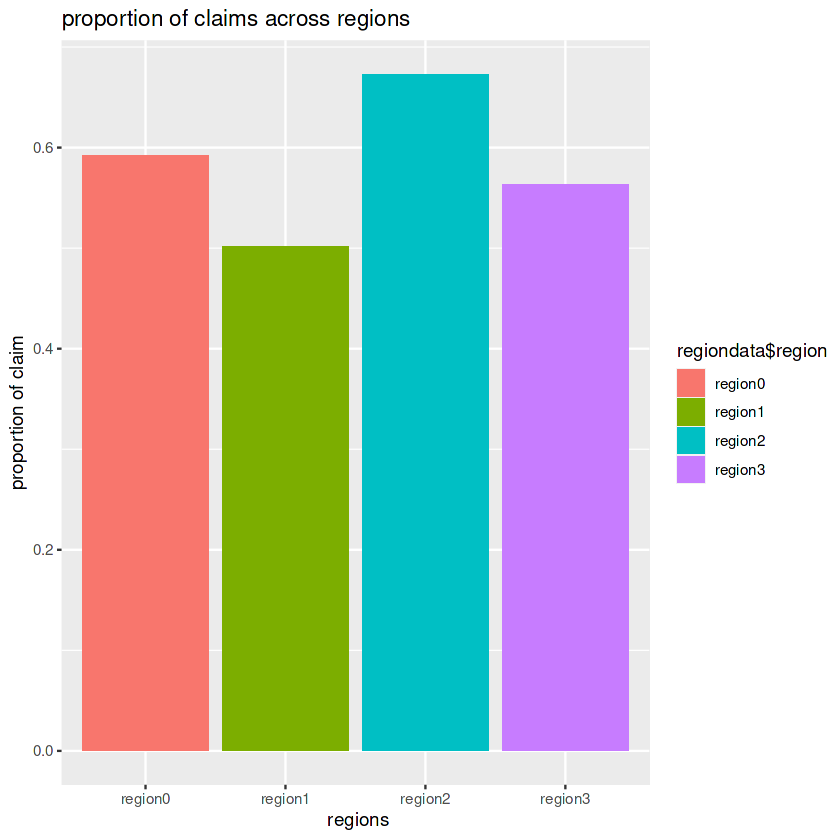

In [15]:
#relation of insurance claim and region


#region0
l=NROW(data1$region[data1$insuranceclaim=="yes"&data1$region=="region0"])/NROW(data1$region[data1$region=="region0"])

#region1
m=NROW(data1$region[data1$insuranceclaim=="yes"&data1$region=="region1"])/NROW(data1$region[data1$region=="region1"])

#region2
n=NROW(data1$region[data1$insuranceclaim=="yes"&data1$region=="region2"])/NROW(data1$region[data1$region=="region2"])

#region3
o=NROW(data1$region[data1$insuranceclaim=="yes"&data1$region=="region3"])/NROW(data1$region[data1$region=="region3"])


regiondata=data.frame(c(l,m,n,o),c("region0","region1","region2","region3"))

names(regiondata)=c("claimprop","region")

ggplot(data=regiondata,aes(x=regiondata$region,y=regiondata$claimprop,fill=regiondata$region))+geom_bar(stat="identity")+labs(title = "proportion of claims across regions",x=" regions",y="proportion of claim")


**the above plot indicate that region2 is having highest claim proportion and region1 is having lowest claim proportion**

# Multiple linear regression (for charges)

**as we know that the liner regression can be only used when data follows normal distribution but here the data is positively skewed and non normally distributed**

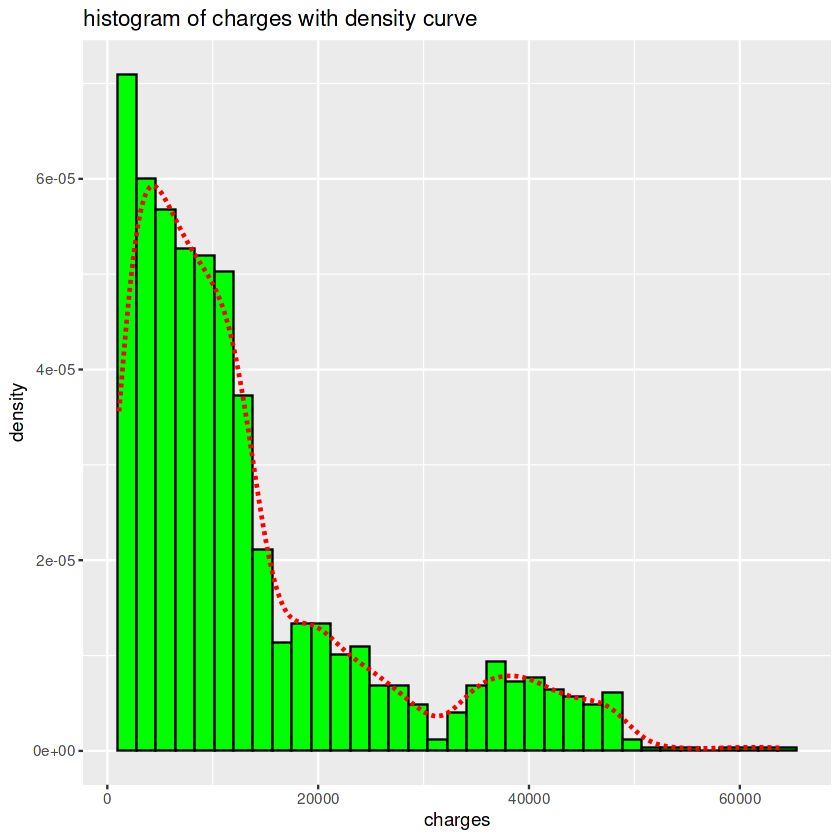

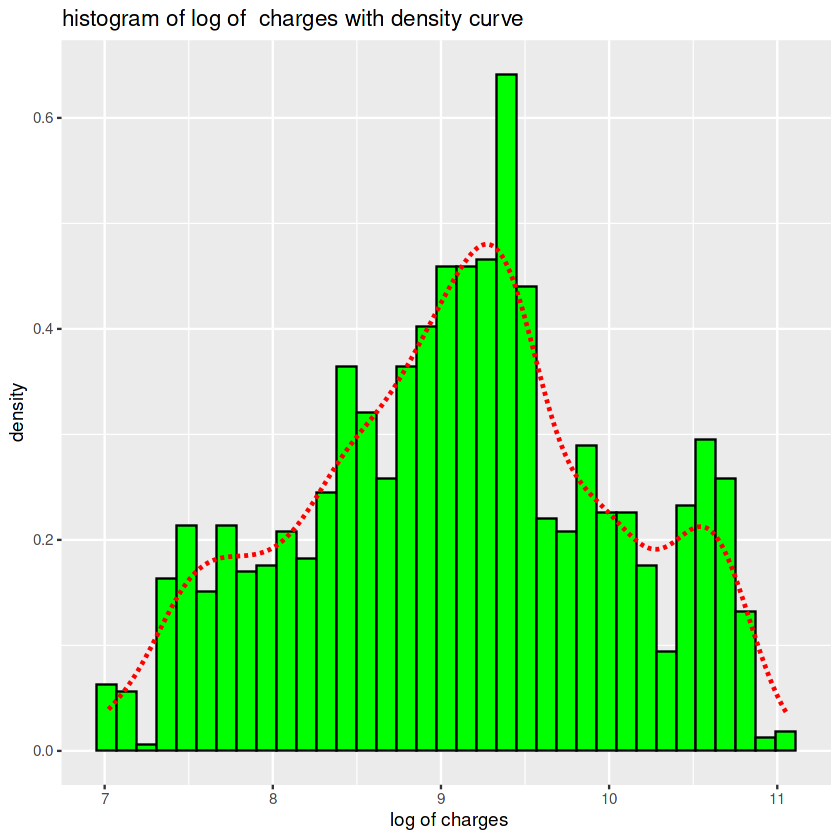

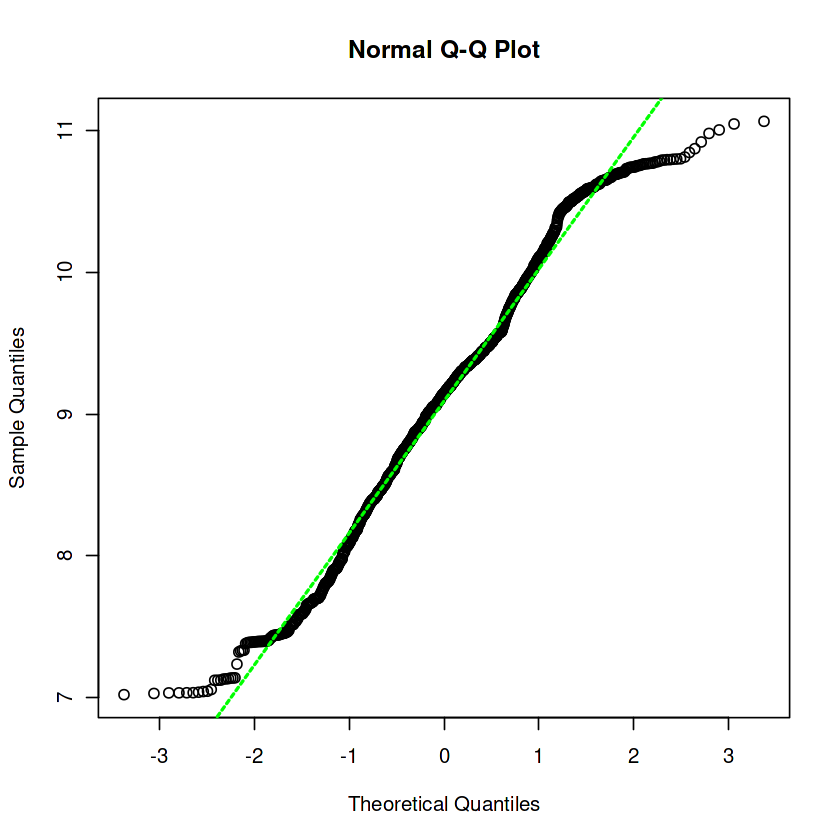

In [16]:
# as we know that the liner regression can be only used when data follows normal distribution but here the data is positively skewed and non normally distributed 

ggplot(data=data1,aes(data1$charges))+geom_histogram(mapping = aes(y=stat(density)),bins = 35,colour="black",fill="green")+geom_density(col="red",lwd=1,lty=2)+labs(title = "histogram of charges with density curve ",x="charges")


#now we are taking log of charges to analyse the shape of distribution of log(charges)

ggplot(data=data1,aes(log(data1$charges)))+geom_histogram(mapping = aes(y=stat(density)),bins = 35,colour="black",fill="green")+geom_density(col="red",lwd=1,lty=2)+labs(title = "histogram of log of  charges with density curve ",x=" log of charges")

#now by using qqplot 

qqnorm(log(data1$charges))
qqline(log(data1$charges),col="green",lty=2,lwd=2)


**As we can notice that after taking log with base e the graph of charges have become approximately symmetric and normally distributed which can be confirmed by QQ plot of Ln(charges)**

**outliers analysis on ln(charges)**

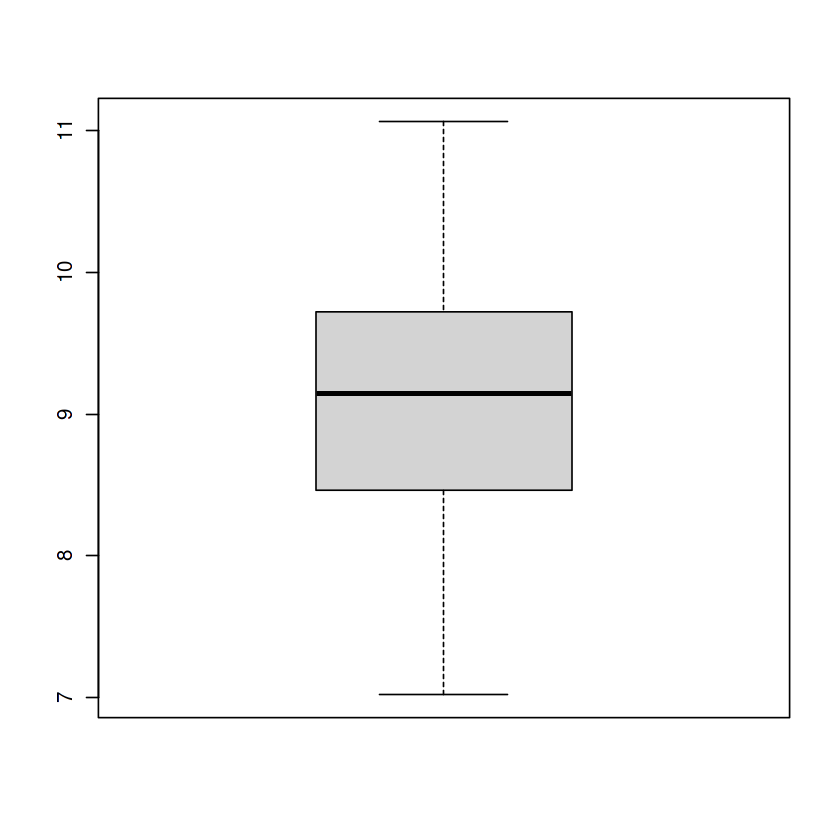

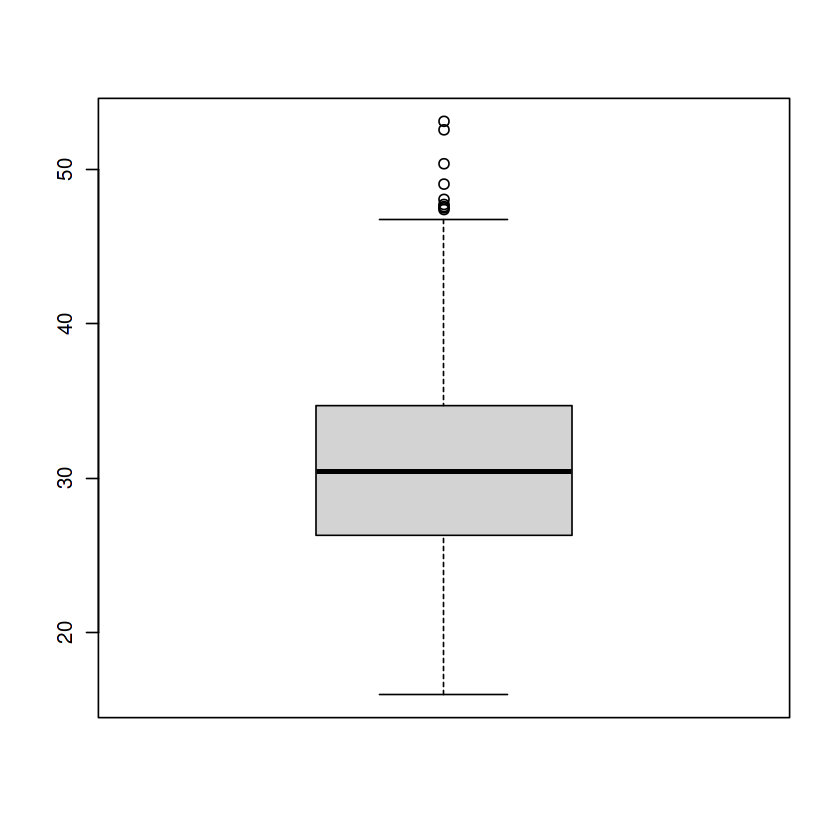

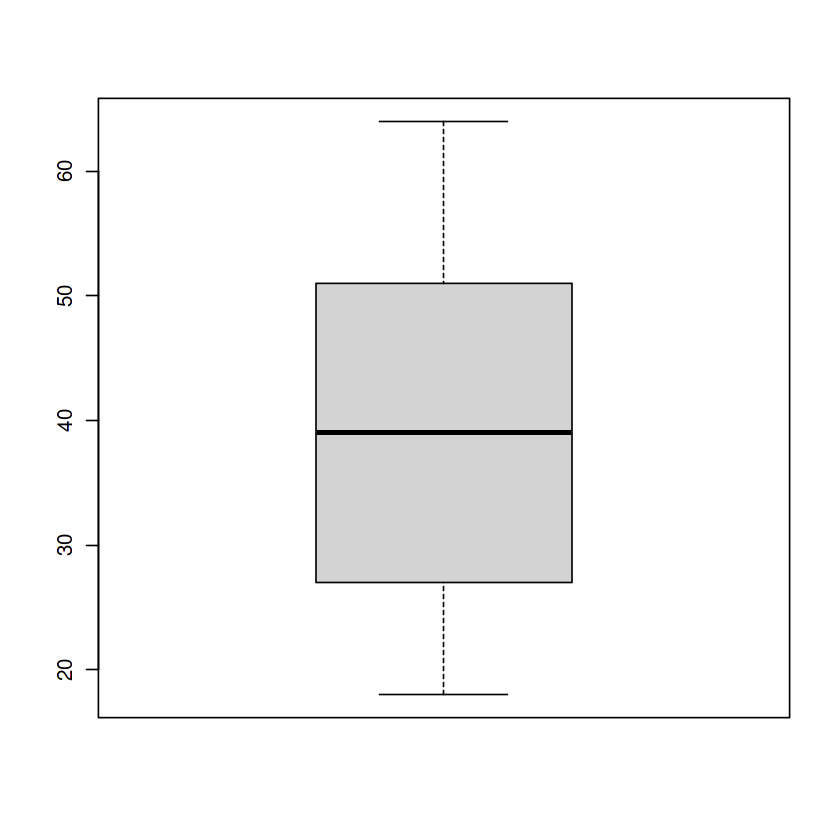

In [17]:
boxplot(log(data1$charges))
boxplot(data1$bmi)
boxplot(data1$age)

**as we can notice that there is no outliers in Ln(charges) but there are some outliers in bmi so we must remove this from data before modelling the charges**


In [18]:
outliers=which(data1$bmi>46)
outliers

data1=data1[-outliers,]



[1]  117  287  402  439  455  544  548  550  661  848  861  931  942 1048 1089
[16] 1318

**all outliers are now removed from data1**

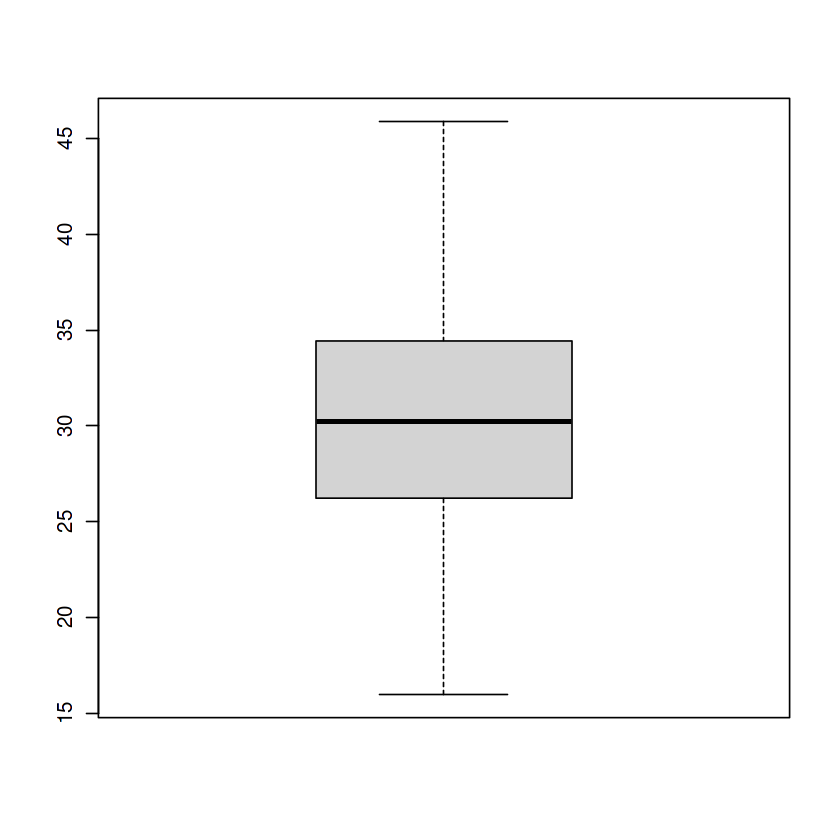

In [19]:
boxplot(data1$bmi)

**now all the outliers are removed from data as there are only three numerical variable**

**now splitting data into two parts one will be used for training and one will be used for testing of model**

**NOTE that for training purpose we will use data named as data and for testing purpose we will use data named as data2**

In [20]:
#setting arbitrary seed to 9654
set.seed(9654)
library(caTools)
split=sample.split(data1,SplitRatio = 0.8)
data=subset(data1,split==TRUE)
data2=subset(data1,split==FALSE)


In [21]:
model=lm(log(charges)~age+sex+bmi+children+smoker+region+age:smoker+bmi:smoker+I(log(age))+I(log(bmi))+age:children+age:region+smoker:children,data = data)
model
summary(model)


Call:
lm(formula = log(charges) ~ age + sex + bmi + children + smoker + 
    region + age:smoker + bmi:smoker + I(log(age)) + I(log(bmi)) + 
    age:children + age:region + smoker:children, data = data)

Coefficients:
                (Intercept)                          age  
                   3.166943                     0.026205  
                    sexmale                          bmi  
                  -0.103973                    -0.036094  
          children1children            children2children  
                   0.371829                     0.878982  
          children3children            children4children  
                   0.648685                     1.416978  
          children5children                    smokeryes  
                   1.170187                     1.378128  
              regionregion1                regionregion2  
                  -0.176288                    -0.538260  
              regionregion3                  I(log(age))  
              


Call:
lm(formula = log(charges) ~ age + sex + bmi + children + smoker + 
    region + age:smoker + bmi:smoker + I(log(age)) + I(log(bmi)) + 
    age:children + age:region + smoker:children, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49960 -0.14968 -0.08743 -0.00074  2.42264 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  3.166943   1.222060   2.591 0.009701 ** 
age                          0.026205   0.005560   4.713 2.80e-06 ***
sexmale                     -0.103973   0.022821  -4.556 5.88e-06 ***
bmi                         -0.036094   0.016350  -2.208 0.027513 *  
children1children            0.371829   0.089232   4.167 3.36e-05 ***
children2children            0.878982   0.112582   7.807 1.52e-14 ***
children3children            0.648685   0.136990   4.735 2.52e-06 ***
children4children            1.416978   0.284271   4.985 7.36e-07 ***
children5children            1.170187   0.40894

**This model is able to explain around 85.5% of variability of data which indicate it is a good fit**

# Residual analysis on model

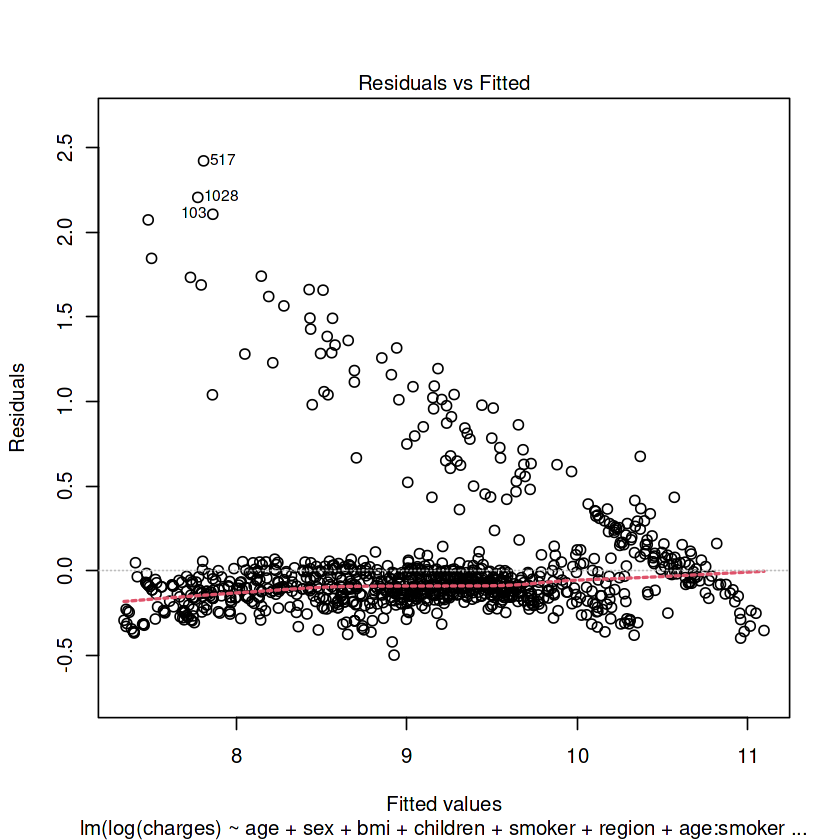

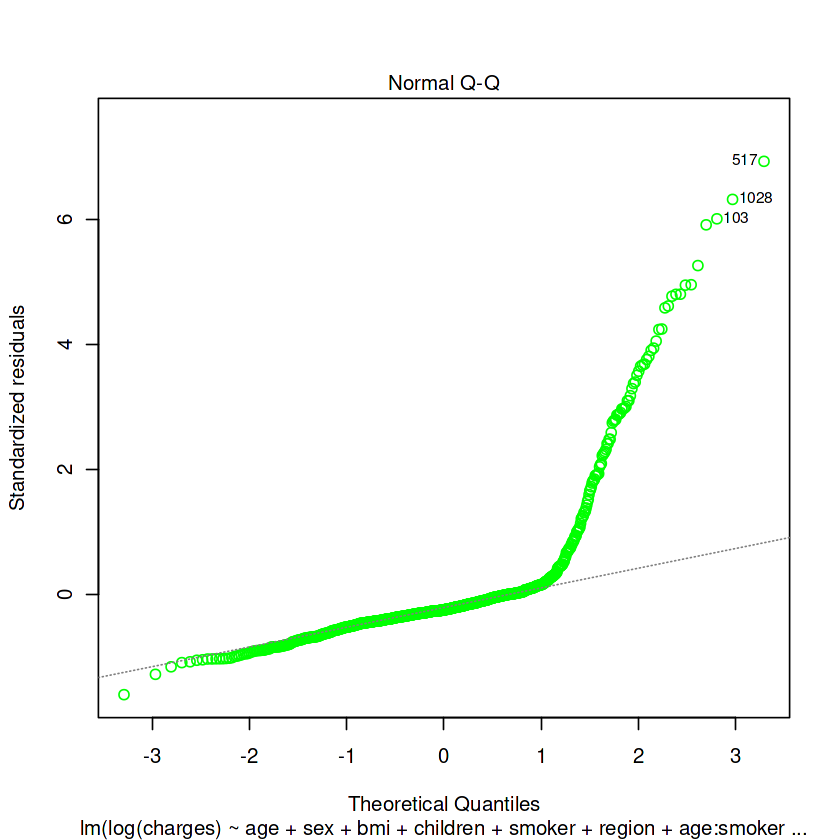

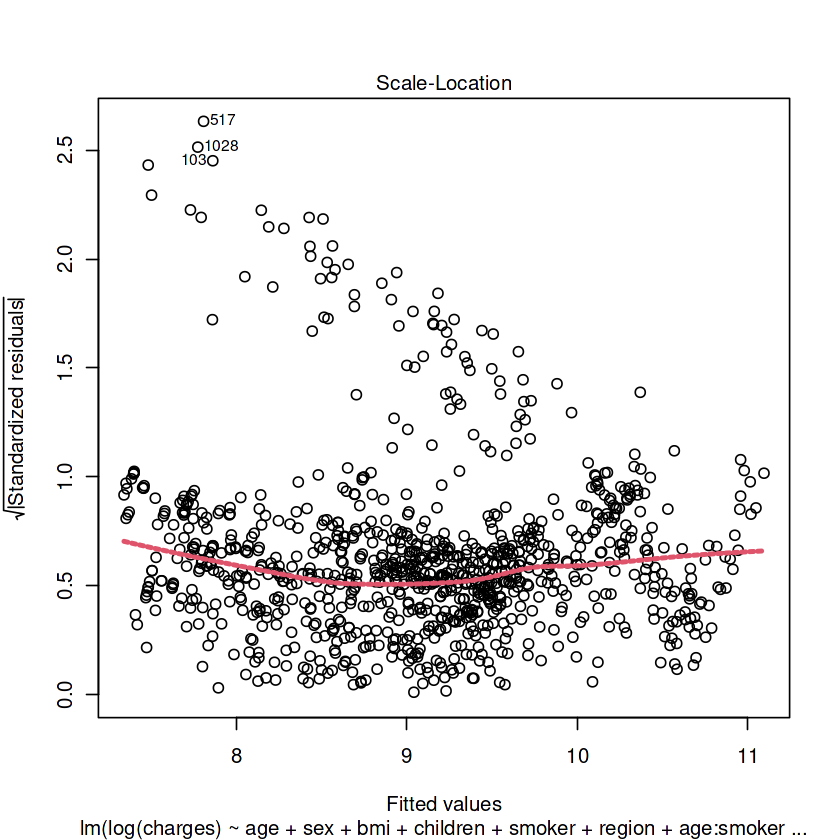

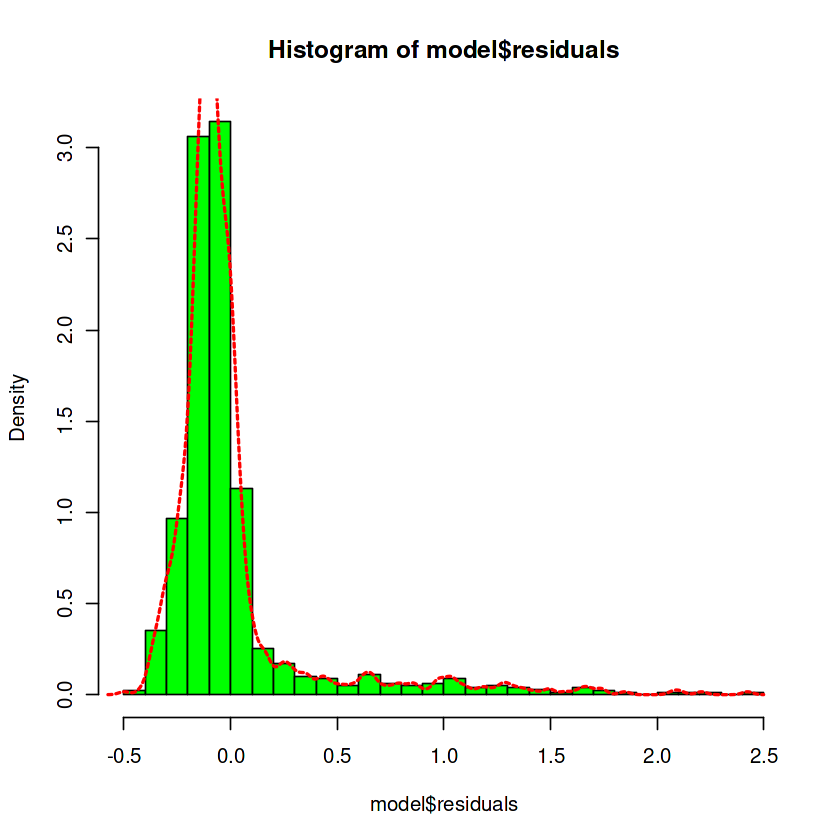

In [22]:
#analysing the plots of model

#1 residual vs fitted plot 

plot(model,1,lwd=2,lty=2)

#2 Q-Q plot 

plot(model,2,col="green")

#3 scale location graph 

plot(model,3,lwd=3,lty=2)

# histogram of residuals

hist(model$residuals,breaks = 35,probability = TRUE,col="green")
lines(density(model$residuals),col="red",lwd=2,lty=2)


**The first plot is indicating that there is not perticular pattern observed in the model and the dotted red line is very close to dotted black line indicating that expected value of error is almost 0**

**the second plot is indicating the errors are normally distributed at left and mid part of plot but a large deviation is observed at right part of plot but density of residuals are low in that deviation**

**the third plot is indicating that variance of error is approximately constant everywhere as the dotted red line is approximately horizontal**

**the fourth plot is histogram of residual**

# Testing of model

In [23]:
#testing of model for data2( test data )

newdata=data2

#testing model

pv=predict(model,newdata = newdata)

# total variability explained by model 

totvar=sum((pv-mean(log(data2$charges)))^(2))

#total variability of data2

modvar=sum((log(data2$charges)-mean(log(data2$charges)))^(2))

#R^(2)

r2=sum((pv-mean(log(data2$charges)))^(2))/sum((log(data2$charges)-mean(log(data2$charges)))^(2))

testing_report=data.frame(c("total variability of data2","total variability explained by model 
","R2 score on testing data"),c(totvar,modvar,r2))

names(testing_report)=c("variability","total")

testing_report

variability,total
<chr>,<dbl>
total variability of data2,237.6898516
total variability explained by model,267.3026059
R2 score on testing data,0.8892164


**the above report indicate that R2 score of model on testing data is approximately 89% which indicate that overfitting is not done and model is predicting good enough**

# Generalised linear model (for claim)

**here also we will train our model on data and test our model on data2**

**we are making a generalised linear model with logit link function and assuming that whether a person claim or not can be modelled using binomial distribution for a perticular individual**

In [24]:
gmodel=glm(insuranceclaim~age+sex+bmi+children+smoker,family = binomial(link = "logit"),data=data)
gmodel
summary(gmodel)


Call:  glm(formula = insuranceclaim ~ age + sex + bmi + children + smoker, 
    family = binomial(link = "logit"), data = data)

Coefficients:
      (Intercept)                age            sexmale                bmi  
         -8.21890            0.03101           -0.06603            0.28963  
children1children  children2children  children3children  children4children  
         -2.10172           -3.48830           -4.35858           -6.02506  
children5children          smokeryes  
         -3.22448            4.30400  

Degrees of Freedom: 991 Total (i.e. Null);  982 Residual
Null Deviance:	    1348 
Residual Deviance: 712 	AIC: 732


Call:
glm(formula = insuranceclaim ~ age + sex + bmi + children + smoker, 
    family = binomial(link = "logit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0677  -0.6018   0.1040   0.4931   3.3334  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -8.218903   0.722626 -11.374  < 2e-16 ***
age                0.031011   0.007102   4.367 1.26e-05 ***
sexmale           -0.066033   0.188533  -0.350    0.726    
bmi                0.289632   0.023083  12.548  < 2e-16 ***
children1children -2.101721   0.245188  -8.572  < 2e-16 ***
children2children -3.488298   0.307582 -11.341  < 2e-16 ***
children3children -4.358579   0.390852 -11.151  < 2e-16 ***
children4children -6.025060   0.962737  -6.258 3.89e-10 ***
children5children -3.224480   0.819195  -3.936 8.28e-05 ***
smokeryes          4.303998   0.384027  11.208  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion par

**the above summary indicate that maximum parameters are significant**

**checking for the fit of the model - here we are assuming if the probability is higher than 50% than the person will claim and if the probability is smaller than 50% than the person will not claim**

**let fv indicate fitted value of model indicating whether the person will claim or not**

In [25]:
fv=cut(gmodel$fitted.values,breaks = c(0,0.5,1),labels = c("no","yes"))

mean(fv==data$insuranceclaim)


[1] 0.8770161

**so we can say that in training data around 88% of the cases were correctly predicted by gmodel which indicate that it is good fit**

# Testing of Gmodel

**here we are testing our gmodel on data2(test data)**

**let pv be defined as predicted values of whether the person have done or not the claim**

In [26]:
pv=cut(predict(gmodel,data2,type = "response"),breaks = c(0,0.5,1),labels = c("no","yes")) 

conf.matrix=table(actual_value=data2$insuranceclaim,predicted_value=pv)
conf.matrix


            predicted_value
actual_value  no yes
         no  114  27
         yes  18 171

**from above we can say that in most of cases the gmodel has correctly predicted now lets find out accuracy of model**

In [27]:
mean(pv==data2$insuranceclaim)

[1] 0.8636364

**so we can say that in testing data the gmodel has accurately predicted around 86% of cases**

# Estimating aggregate claim 

**This model will be combination of above two models but this will be used to predict the aggregate claim which insurance company will going to pay this is noting but combination of above two models**

**the aggregate claim model is based on idea that if hospitilization charge and whether the person will claim or not can be predicted then the aggregate claim amount that insurance company will pay can be predicted as total aggregate claim paid by insurance company is sum of all hospitilization charge given claim has been done by the person**

**we will firstly check the evaluate aggregate claim on training data set and then on testing data set**

amount,type
<dbl>,<chr>
9271663,actual
9162458,estimated


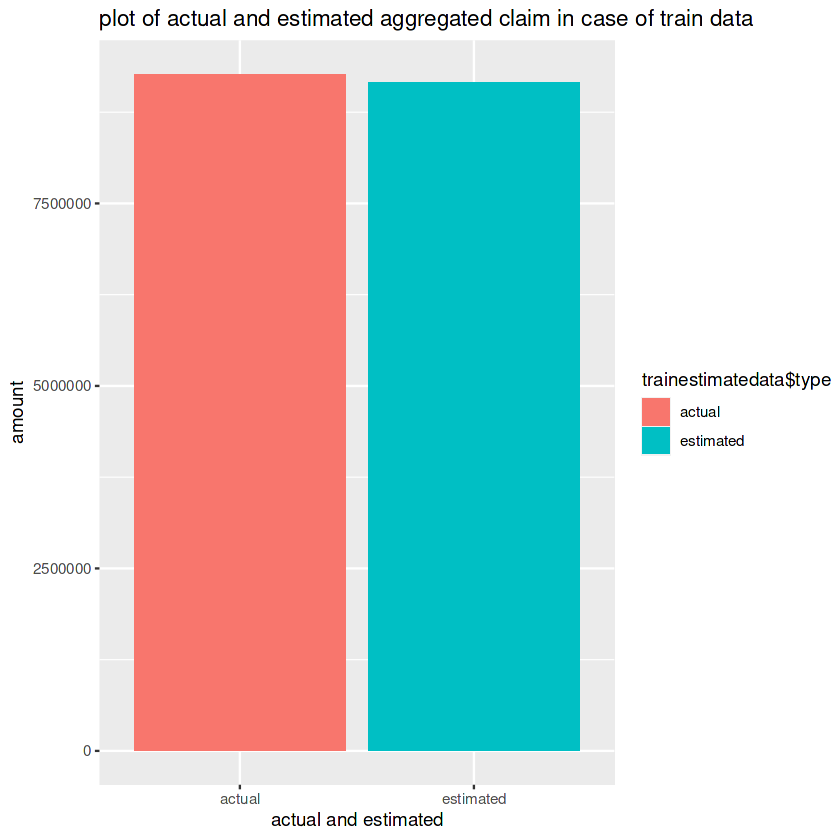

In [28]:
#train data 

#total aggregate claim paid by insurance company as per train data 

actual_aggregate_claim_traindata=sum(data$charges[data$insuranceclaim=="yes"])

data3=data.frame(exp(model$fitted.values),fv)

names(data3)=c("estimatedcharges","claim")

estimated_aggregate_claim_traindata=sum(data3$estimatedcharges[data3$claim=="yes"])

trainestimatedata=data.frame(c(actual_aggregate_claim_traindata,estimated_aggregate_claim_traindata),c("actual","estimated"))

names(trainestimatedata)=c("amount","type")

trainestimatedata

ggplot(data=trainestimatedata,aes(x=trainestimatedata$type,y=trainestimatedata$amount,fill=trainestimatedata$type))+geom_bar(stat="identity")+labs(title = "plot of actual and estimated aggregated claim in case of train data",x="actual and estimated",y="amount")


**so estimated and actual are nearly same in case of train data**

**now checking for testing data**

amount,type
<dbl>,<chr>
3298046,actual
3248957,estimated


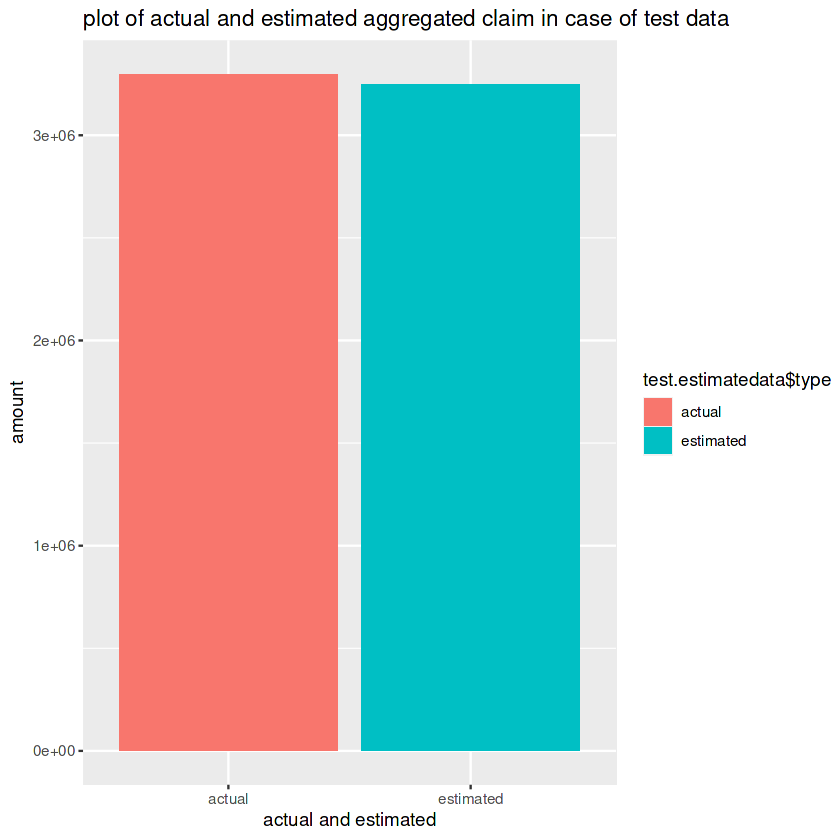

In [29]:
#test data 

#total aggregate claim paid by insurance company as per test data 

actual_aggregate_claim_testdata=sum(data2$charges[data2$insuranceclaim=="yes"])

#estimating hospitilization charges and claim by a person using both of the models

data4=data.frame(exp(predict(model,newdata = data2)),pv)

names(data4)=c("charges","claim")

estimated_aggregate_claim_testdata=sum(data4$charges[data4$claim=="yes"])

test.estimatedata=data.frame(c(actual_aggregate_claim_testdata,estimated_aggregate_claim_testdata),c("actual","estimated"))

names(test.estimatedata)=c("amount","type")

test.estimatedata

ggplot(data=test.estimatedata,aes(x=test.estimatedata$type,y=test.estimatedata$amount,fill=test.estimatedata$type))+geom_bar(stat="identity")+labs(title = "plot of actual and estimated aggregated claim in case of test data",x="actual and estimated",y="amount")



**here also the by using two models we are getting very accurate results**